# SOC SURVEY

In [1]:
# Packages
import numpy as np
import pandas as pd 
import seaborn as sns
import json
import warnings
import requests
from datetime import datetime
import os
import re
from IPython.display import HTML, display, clear_output
from ipywidgets import *
import tabulate
import matplotlib.pyplot as plt

# Disable warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
#os.getcwd()
dataset = pd.read_csv("SOC_Roles_Tools_data.CSV", sep=";", encoding='utf-8')

In [3]:
dataset.head()

,CASE,SERIAL,REF,QUESTNNR,MODE,STARTED,AC01_01,AC03_01,AC04_01,B004_01,...,TIME_SUM,MAILSENT,LASTDATA,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI
0,124,NaN,NaN,affective_grid,interview,2024-03-26 15:56:27,NaN,NaN,NaN,5.0,...,151,NaN,2024-03-26 15:58:58,1,0,3,3,43,7,"2,93"
1,130,NaN,NaN,affective_grid,interview,2024-03-27 09:52:05,NaN,NaN,NaN,5.0,...,853,NaN,2024-03-27 22:36:23,1,0,3,3,35,9,"0,71"
2,132,NaN,NaN,affective_grid,interview,2024-03-27 10:42:53,NaN,NaN,NaN,4.0,...,836,NaN,2024-03-27 20:48:33,1,0,3,3,30,4,"0,54"
3,134,NaN,NaN,affective_grid,interview,2024-03-28 13:02:00,NaN,NaN,NaN,NaN,...,808,NaN,2024-03-28 13:15:28,0,0,2,2,81,80,"1,63"
4,139,NaN,NaN,affective_grid,interview,2024-03-28 22:39:21,NaN,NaN,NaN,5.0,...,252,NaN,2024-03-28 22:43:34,0,0,2,2,52,50,"1,87"


In [4]:
# Valid surveys
len(dataset)

24

## Survey Participant Branche

In [5]:
branche = dataset["B006_01"].value_counts()
branche

Defense                                  6
Consulting                               3
Defence                                  2
Defense Industry, Academia               1
Public Defence Sector                    1
security                                 1
Government                               1
Automotive Industry, Public Research     1
Defence, Government and Manufacturing    1
Telco and defense                        1
DEFENSE                                  1
Education                                1
Automobil                                1
Name: B006_01, dtype: int64

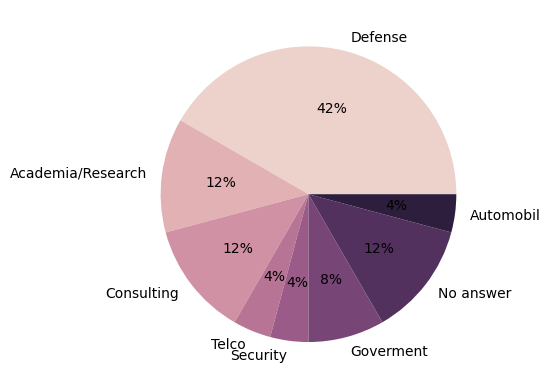

In [75]:
colors = sns.cubehelix_palette(8)
y = np.array([10, 3, 3, 1, 1, 2,3,1])
mylabels = ["Defense", "Academia/Research", "Consulting", "Telco", "Security", "Goverment", "No answer", "Automobil"]

plt.pie(y, labels = mylabels, colors = colors, autopct='%.0f%%')
plt.show()

## Survey Participant Age

In [7]:
age = dataset["B007"].value_counts()
age

3    10
2     9
4     3
5     1
1     1
Name: B007, dtype: int64

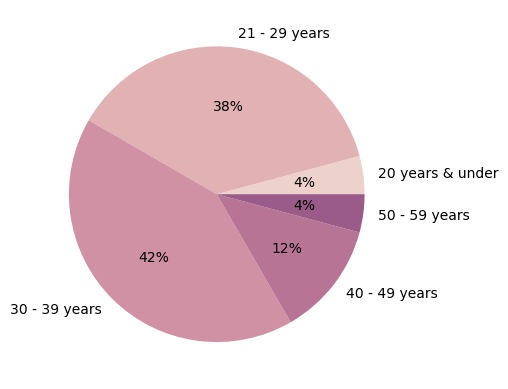

In [77]:
y = np.array([1, 9, 10, 3, 1])
mylabels = ["20 years & under", "21 - 29 years", "30 - 39 years", "40 - 49 years", "50 - 59 years"]

plt.pie(y, labels = mylabels, colors = colors, autopct='%.0f%%')
plt.show()

## Survey Participant Experience

1 = Not confident at all
2 = Slightly confident
3 = Somewhat confident
4 = Fairly confident
5 = Completely confident
-9 = No answer

In [9]:
# Aufteilung der URL Typen
SOC_Analyst = dataset["B004_01"].value_counts()
Malware_Analyst = dataset["B004_02"].value_counts()
Forensics_Specialist = dataset["B004_03"].value_counts()
Detection_Engineer = dataset["B004_04"].value_counts()
Security_Engineer = dataset["B004_05"].value_counts()
SIEM_Content_Engineer = dataset["B004_06"].value_counts()
Threat_Intelligence_Analyst = dataset["B004_07"].value_counts()
Threat_Hunter = dataset["B004_08"].value_counts() 
Red_Team_Specialist = dataset["B004_09"].value_counts()
Incident_Responder = dataset["B004_10"].value_counts() 
Security_Architect = dataset["B004_11"].value_counts() 
Security_Consultant = dataset["B004_12"].value_counts() 
Chief_Information_Security_Officer = dataset["B004_13"].value_counts() 
SOC_Manager = dataset["B004_14"].value_counts() 
IT_Compliance_Manager = dataset["B004_15"].value_counts()
Incident_and_Crisis_Manager = dataset["B004_16"].value_counts()
Vulnerability_and_Risk_Manager = dataset["B004_17"].value_counts() 
Security_Researcher = dataset["B004_18"].value_counts()

In [63]:
dataset["B004_11"].value_counts()

1.0    9
4.0    6
2.0    4
5.0    3
3.0    1
Name: B004_11, dtype: int64

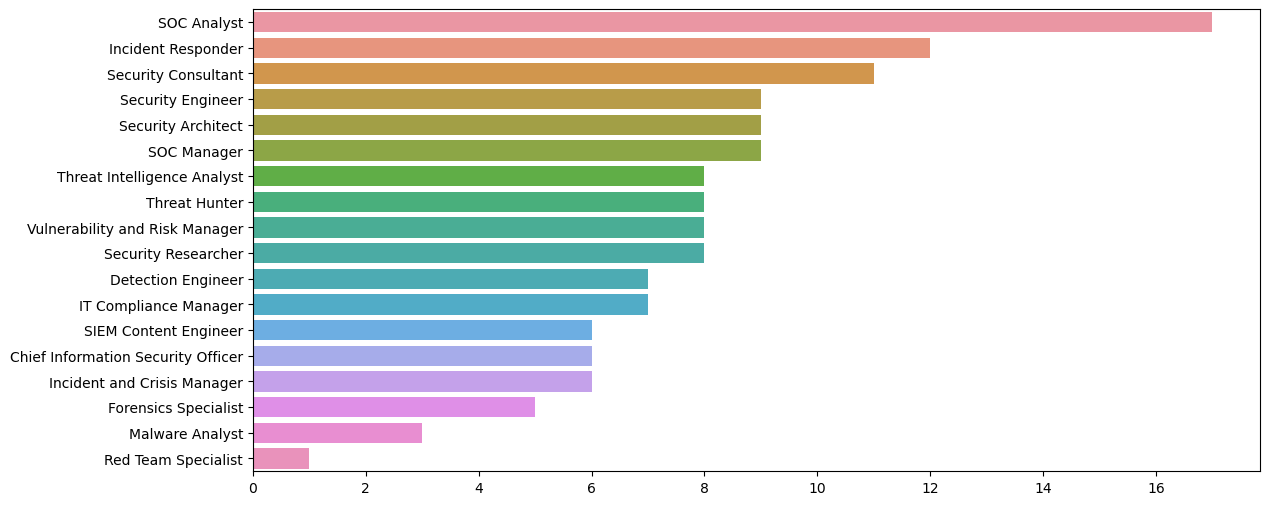

In [83]:
plt.figure(figsize=(13,6))

mylabels = ["SOC Analyst","Incident Responder","Security Consultant","Security Engineer","Security Architect","SOC Manager","Threat Intelligence Analyst","Threat Hunter","Vulnerability and Risk Manager","Security Researcher","Detection Engineer","IT Compliance Manager","SIEM Content Engineer","Chief Information Security Officer","Incident and Crisis Manager","Forensics Specialist","Malware Analyst","Red Team Specialist"]
x = [17,12,11,9,9,9,8,8,8,8,7,7,6,6,6,5,3,1]

sns.barplot(x=x, y=mylabels)
plt.show()

### SOC Analyst

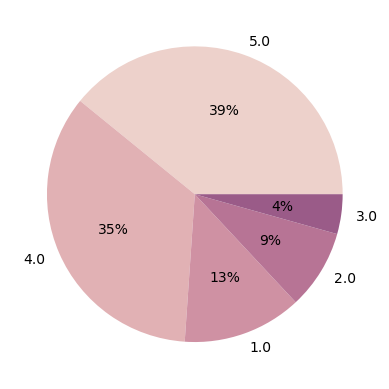

In [73]:
colors = sns.cubehelix_palette(8)
plt.pie(SOC_Analyst.values, labels = SOC_Analyst.index, colors = colors, autopct='%.0f%%')
plt.show()

### Malware Analyst

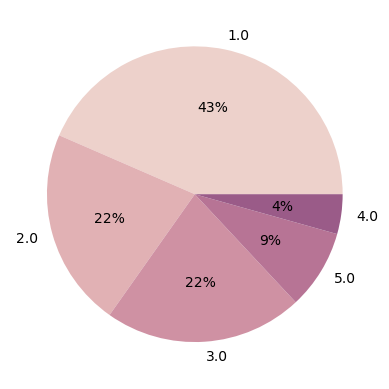

In [74]:
plt.pie(Malware_Analyst.values, labels = Malware_Analyst.index, colors = colors, autopct='%.0f%%')
plt.show()

### Forensics Specialist

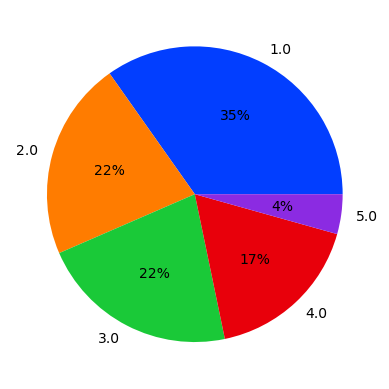

In [12]:
colors = sns.color_palette('bright')[0:6]
plt.pie(Forensics_Specialist.values, labels = Forensics_Specialist.index, colors = colors, autopct='%.0f%%')
plt.show()

### Detection_Engineer

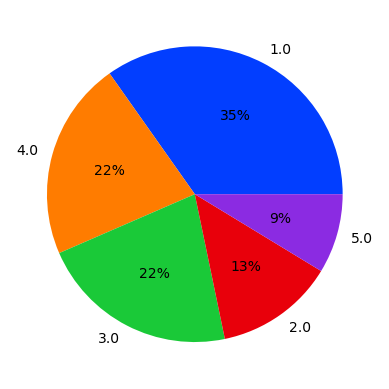

In [13]:
colors = sns.color_palette('bright')[0:6]
plt.pie(Detection_Engineer.values, labels = Detection_Engineer.index, colors = colors, autopct='%.0f%%')
plt.show()

### Security Engineer

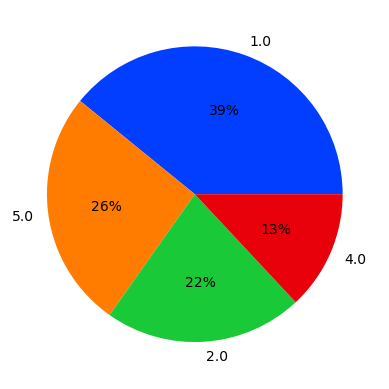

In [14]:
colors = sns.color_palette('bright')[0:6]
plt.pie(Security_Engineer.values, labels = Security_Engineer.index, colors = colors, autopct='%.0f%%')
plt.show()

### SIEM Content Engineer

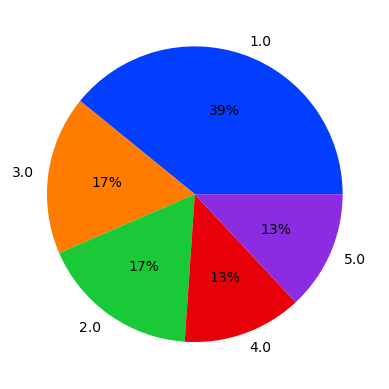

In [15]:
colors = sns.color_palette('bright')[0:6]
plt.pie(SIEM_Content_Engineer.values, labels = SIEM_Content_Engineer.index, colors = colors, autopct='%.0f%%')
plt.show()

### Threat_Intelligence_Analyst

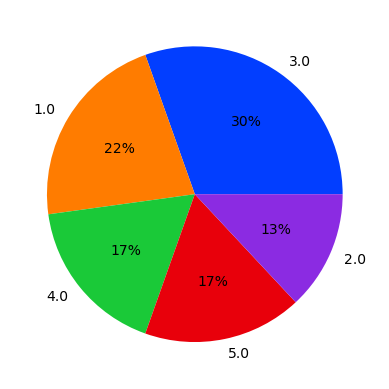

In [16]:
colors = sns.color_palette('bright')[0:6]
plt.pie(Threat_Intelligence_Analyst.values, labels = Threat_Intelligence_Analyst.index, colors = colors, autopct='%.0f%%')
plt.show()

### Threat_Hunter

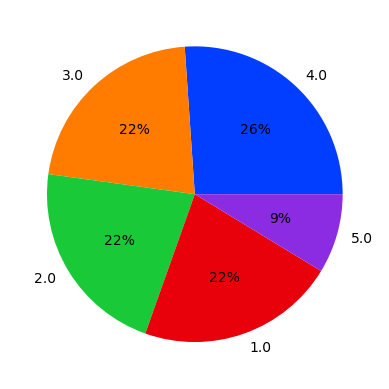

In [17]:
colors = sns.color_palette('bright')[0:6]
plt.pie(Threat_Hunter.values, labels = Threat_Hunter.index, colors = colors, autopct='%.0f%%')
plt.show()

### Red Team Specialist

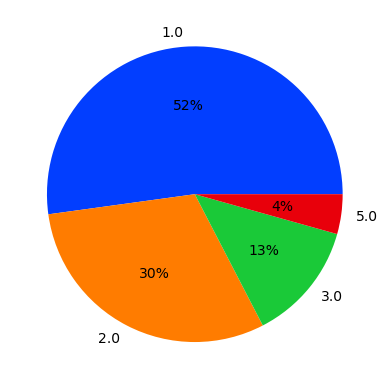

In [18]:
colors = sns.color_palette('bright')[0:6]
plt.pie(Red_Team_Specialist.values, labels = Red_Team_Specialist.index, colors = colors, autopct='%.0f%%')
plt.show()

### Incident Responder

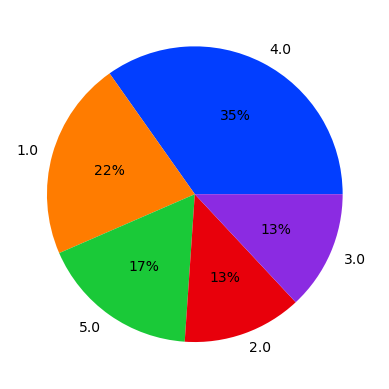

In [19]:
colors = sns.color_palette('bright')[0:6]
plt.pie(Incident_Responder.values, labels = Incident_Responder.index, colors = colors, autopct='%.0f%%')
plt.show()

### Security Architect

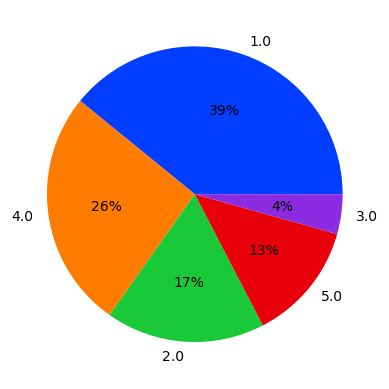

In [20]:
colors = sns.color_palette('bright')[0:6]
plt.pie(Security_Architect.values, labels = Security_Architect.index, colors = colors, autopct='%.0f%%')
plt.show()

### Security Consultant

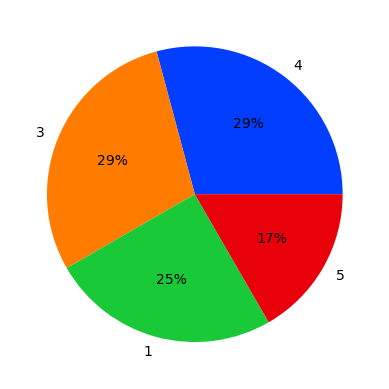

In [21]:
colors = sns.color_palette('bright')[0:6]
plt.pie(Security_Consultant.values, labels = Security_Consultant.index, colors = colors, autopct='%.0f%%')
plt.show()

### Chief Information Security Officer

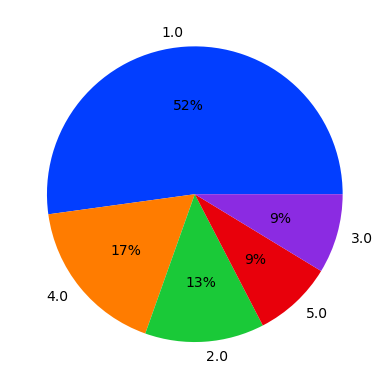

In [22]:
colors = sns.color_palette('bright')[0:6]
plt.pie(Chief_Information_Security_Officer.values, labels = Chief_Information_Security_Officer.index, colors = colors, autopct='%.0f%%')
plt.show()

### SOC Manager 

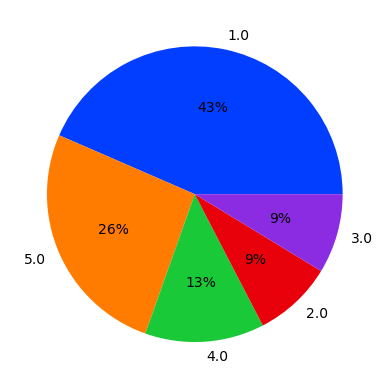

In [23]:
colors = sns.color_palette('bright')[0:6]
plt.pie(SOC_Manager.values, labels = SOC_Manager.index, colors = colors, autopct='%.0f%%')
plt.show()

### IT Compliance Manager

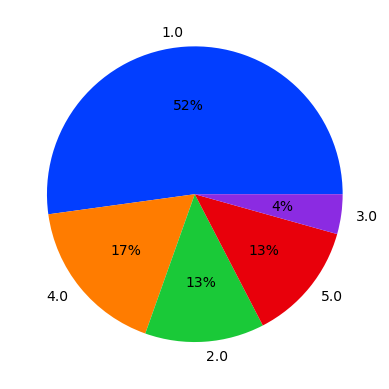

In [24]:
colors = sns.color_palette('bright')[0:6]
plt.pie(IT_Compliance_Manager.values, labels = IT_Compliance_Manager.index, colors = colors, autopct='%.0f%%')
plt.show()

### Incident and Crisis Manager

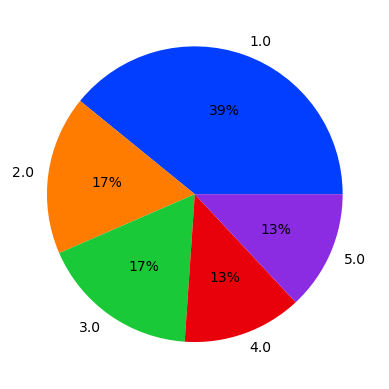

In [25]:
colors = sns.color_palette('bright')[0:6]
plt.pie(Incident_and_Crisis_Manager.values, labels = Incident_and_Crisis_Manager.index, colors = colors, autopct='%.0f%%')
plt.show()

### Vulnerability and Risk Manager

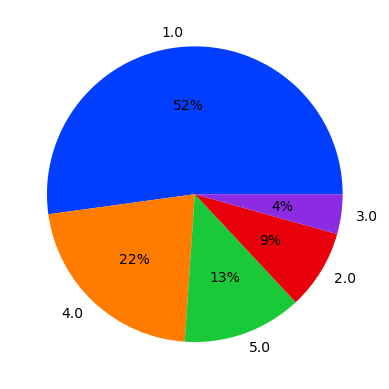

In [26]:
colors = sns.color_palette('bright')[0:6]
plt.pie(Vulnerability_and_Risk_Manager.values, labels = Vulnerability_and_Risk_Manager.index, colors = colors, autopct='%.0f%%')
plt.show()

### Security Researcher

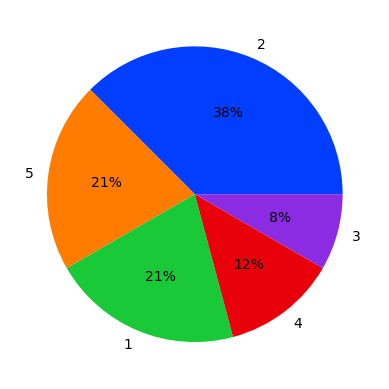

In [27]:
colors = sns.color_palette('bright')[0:6]
plt.pie(Security_Researcher.values, labels = Security_Researcher.index, colors = colors, autopct='%.0f%%')
plt.show()

## Roles

#### Technical

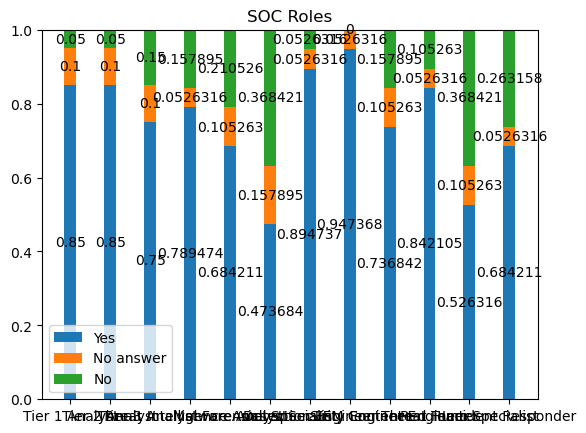

In [84]:
roles = ("Tier 1 Analyst" , "Tier 2 Analyst" , "Tier 3 Analyst" , "Threat Intelligence Analyst", "Malware Analyst" , "Forensics Specialist" , "Detection Engineer" , "Security Engineer" , "SIEM Content Engineer", "Threat Hunter" , "Red Team Specialist" , "Incident Responder")
roles_counts = {
    'Yes': np.array([dataset["R002"].value_counts(normalize=True)[1.0], 
                    dataset["R003"].value_counts(normalize=True)[1.0], 
                    dataset["R004"].value_counts(normalize=True)[1.0], 
                    dataset["R010"].value_counts(normalize=True)[1.0], 
                    dataset["R005"].value_counts(normalize=True)[1.0], 
                    dataset["R006"].value_counts(normalize=True)[1.0], 
                    dataset["R007"].value_counts(normalize=True)[1.0], 
                    dataset["R008"].value_counts(normalize=True)[1.0], 
                    dataset["R009"].value_counts(normalize=True)[1.0], 
                    dataset["R011"].value_counts(normalize=True)[1.0], 
                    dataset["R012"].value_counts(normalize=True)[1.0], 
                    dataset["R013"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["R002"].value_counts(normalize=True)[2.0], 
                    dataset["R003"].value_counts(normalize=True)[2.0], 
                    dataset["R004"].value_counts(normalize=True)[2.0], 
                    dataset["R010"].value_counts(normalize=True)[2.0], 
                    dataset["R005"].value_counts(normalize=True)[2.0], 
                    dataset["R006"].value_counts(normalize=True)[2.0], 
                    dataset["R007"].value_counts(normalize=True)[2.0], 
                    dataset["R008"].value_counts(normalize=True)[2.0], 
                    dataset["R009"].value_counts(normalize=True)[2.0], 
                    dataset["R011"].value_counts(normalize=True)[2.0], 
                    dataset["R012"].value_counts(normalize=True)[2.0], 
                    dataset["R013"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["R002"].value_counts(normalize=True)[3.0], 
                    dataset["R003"].value_counts(normalize=True)[3.0], 
                    dataset["R004"].value_counts(normalize=True)[3.0], 
                    dataset["R010"].value_counts(normalize=True)[3.0], 
                    dataset["R005"].value_counts(normalize=True)[3.0], 
                    dataset["R006"].value_counts(normalize=True)[3.0], 
                    dataset["R007"].value_counts(normalize=True)[3.0], 
                    0, 
                    dataset["R009"].value_counts(normalize=True)[3.0], 
                    dataset["R011"].value_counts(normalize=True)[3.0], 
                    dataset["R012"].value_counts(normalize=True)[3.0], 
                    dataset["R013"].value_counts(normalize=True)[3.0]]),
}
width = 0.3  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(12)

for role, roles_count in roles_counts.items():
    p = ax.bar(roles, roles_count, width, label=role, bottom=bottom)
    bottom += roles_count

    ax.bar_label(p, label_type='center')

ax.set_title('SOC Roles')
ax.legend()

plt.show()

#### Managment

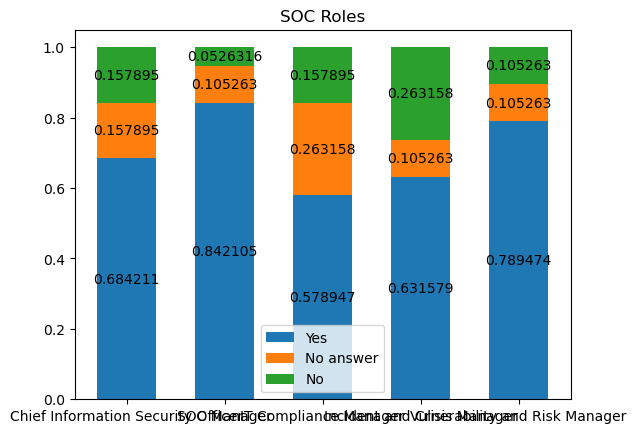

In [29]:
roles = ("Chief Information Security Officer" , "SOC Manager" , "IT Compliance Manager" , "Incident and Crisis Manager" , "Vulnerability and Risk Manager")
roles_counts = {
    'Yes': np.array([dataset["R015"].value_counts(normalize=True)[1.0], 
                    dataset["R016"].value_counts(normalize=True)[1.0], 
                    dataset["R017"].value_counts(normalize=True)[1.0], 
                    dataset["R018"].value_counts(normalize=True)[1.0], 
                    dataset["R019"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["R015"].value_counts(normalize=True)[2.0], 
                    dataset["R016"].value_counts(normalize=True)[2.0], 
                    dataset["R017"].value_counts(normalize=True)[2.0], 
                    dataset["R018"].value_counts(normalize=True)[2.0], 
                    dataset["R019"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["R015"].value_counts(normalize=True)[3.0], 
                    dataset["R016"].value_counts(normalize=True)[3.0], 
                    dataset["R017"].value_counts(normalize=True)[3.0], 
                    dataset["R018"].value_counts(normalize=True)[3.0], 
                    dataset["R019"].value_counts(normalize=True)[3.0]]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(5)

for role, role_count in roles_counts.items():
    p = ax.bar(roles, role_count, width, label=role, bottom=bottom)
    bottom += role_count

    ax.bar_label(p, label_type='center')

ax.set_title('SOC Roles')
ax.legend()

plt.show()

#### Consulting

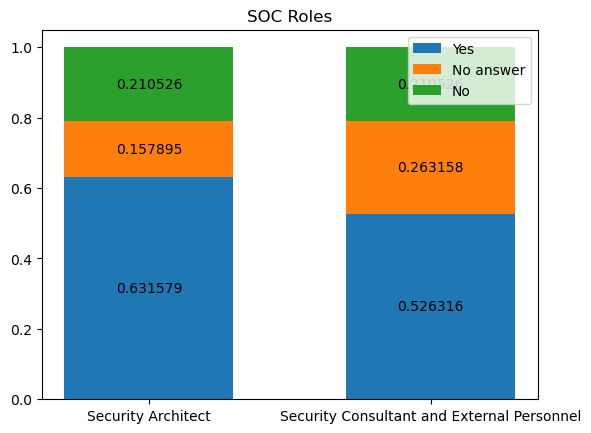

In [30]:
roles = ("Security Architect" , "Security Consultant and External Personnel")
roles_counts = {
    'Yes': np.array([dataset["R021"].value_counts(normalize=True)[1.0], 
                    dataset["R022"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["R021"].value_counts(normalize=True)[2.0], 
                    dataset["R022"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["R021"].value_counts(normalize=True)[3.0], 
                    dataset["R022"].value_counts(normalize=True)[3.0]]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(2)

for role, role_count in roles_counts.items():
    p = ax.bar(roles, role_count, width, label=role, bottom=bottom)
    bottom += role_count

    ax.bar_label(p, label_type='center')

ax.set_title('SOC Roles')
ax.legend()

plt.show()

### Missing Roles

In [31]:
roles_missing = dataset["R024_03"].value_counts()
roles_missing

SOC Security Administrator - effective account and access administration, co ordinates RBAC with vetting and user admin, ensures need to know and permissions are correct within SOC. Ensures SOC tool compliance (patching, updates, connectivity). Coordinates professional services and wider department access to SOC (read only, read/write) within dashboards.    1
Cybber Security Awareness Role;                                                                                                                                                                                                                                                                                                                                         1
Name: R024_03, dtype: int64

## Tools

#### Data Collection and Management

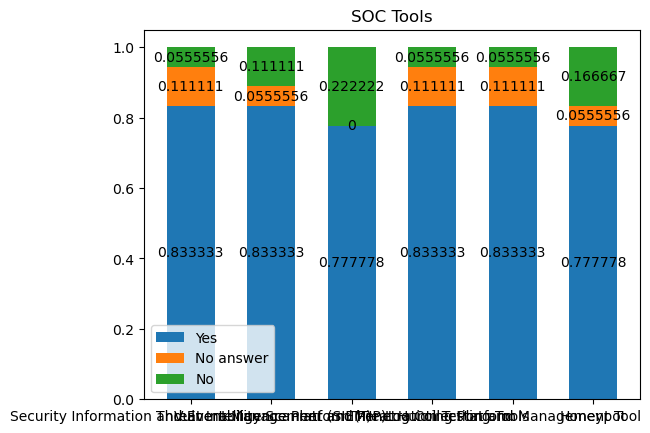

In [32]:
tools = ("Security Information and Event Management (SIEM)" , "Threat Intelligence Platform (TIP)", "Vulnerability Scanner and Penetration Testing Tools", "Threat Hunting Platform", "Log Collection and Management Tool", "Honeypot")
tools_counts = {
    'Yes': np.array([dataset["T002"].value_counts(normalize=True)[1.0], 
                    dataset["T003"].value_counts(normalize=True)[1.0],
                    dataset["T004"].value_counts(normalize=True)[1.0],
                    dataset["T005"].value_counts(normalize=True)[1.0],
                    dataset["T006"].value_counts(normalize=True)[1.0],
                    dataset["T007"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T002"].value_counts(normalize=True)[2.0], 
                    dataset["T003"].value_counts(normalize=True)[2.0],
                    0,
                    dataset["T005"].value_counts(normalize=True)[2.0],
                    dataset["T006"].value_counts(normalize=True)[2.0],
                    dataset["T007"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["T002"].value_counts(normalize=True)[3.0], 
                    dataset["T003"].value_counts(normalize=True)[3.0],
                    dataset["T004"].value_counts(normalize=True)[3.0],
                    dataset["T005"].value_counts(normalize=True)[3.0],
                    dataset["T006"].value_counts(normalize=True)[3.0],
                    dataset["T007"].value_counts(normalize=True)[3.0]])
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(6)

for tool, tool_count in tools_counts.items():
    p = ax.bar(tools, tool_count, width, label=tool, bottom=bottom)
    bottom += tool_count

    ax.bar_label(p, label_type='center')

ax.set_title('SOC Tools')
ax.legend()

plt.show()

#### Infrastructure Security

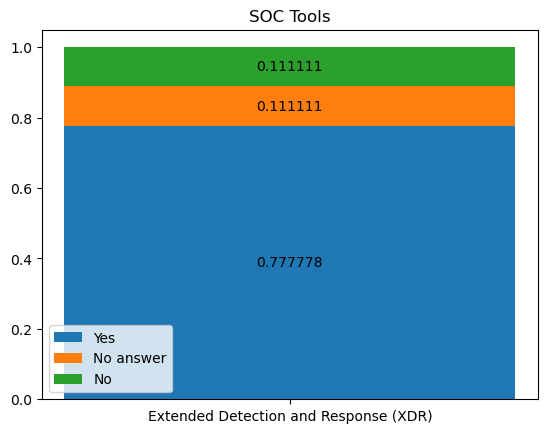

In [33]:
tools = ("Extended Detection and Response (XDR)")
tools_counts = {
    'Yes': np.array([dataset["T009"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T009"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["T009"].value_counts(normalize=True)[3.0]])
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(1)

for tool, tool_count in tools_counts.items():
    p = ax.bar(tools, tool_count, width, label=tool, bottom=bottom)
    bottom += tool_count

    ax.bar_label(p, label_type='center')

ax.set_title('SOC Tools')
ax.legend()

plt.show()

#### Network Security

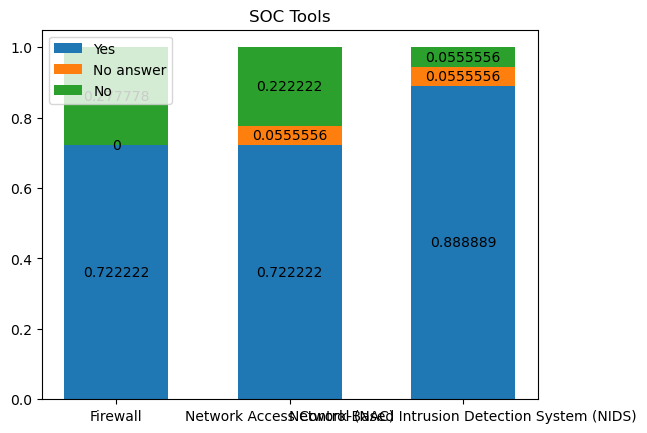

In [87]:
tools = ("Firewall", "Network Access Control (NAC)", "Network-Based Intrusion Detection System (NIDS)")
tools_counts = {
    'Yes': np.array([dataset["T022"].value_counts(normalize=True)[1.0], 
                    dataset["T023"].value_counts(normalize=True)[1.0],
                    dataset["T021"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([0, 
                    dataset["T023"].value_counts(normalize=True)[2.0],
                    dataset["T021"].value_counts(normalize=True)[2.0],]),
    'No': np.array([dataset["T022"].value_counts(normalize=True)[3.0], 
                    dataset["T023"].value_counts(normalize=True)[3.0],
                    dataset["T021"].value_counts(normalize=True)[3.0]])
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for tool, tool_count in tools_counts.items():
    p = ax.bar(tools, tool_count, width, label=tool, bottom=bottom)
    bottom += tool_count

    ax.bar_label(p, label_type='center')

ax.set_title('SOC Tools')
ax.legend()

plt.show()

#### Endpoint Security

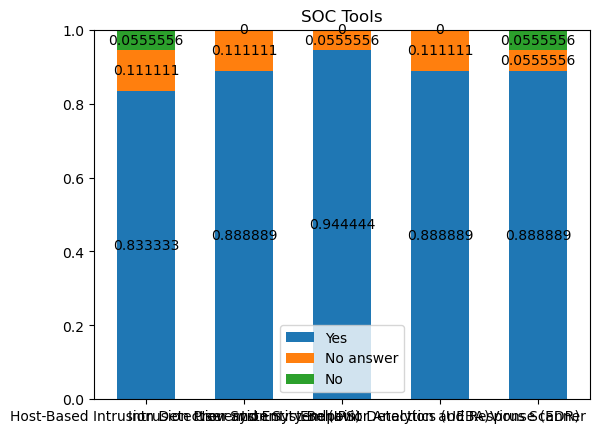

In [86]:
tools = ("Host-Based Intrusion Detection System", "Intrusion Prevention System (IPS)", "User and Entity Behavior Analytics (UEBA)", "Endpoint Detection and Response (EDR)", "Virus Scanner")
tools_counts = {
    'Yes': np.array([dataset["T012"].value_counts(normalize=True)[1.0], 
                    dataset["T013"].value_counts(normalize=True)[1.0],
                    dataset["T014"].value_counts(normalize=True)[1.0],
                    dataset["T015"].value_counts(normalize=True)[1.0],
                    dataset["T011"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T012"].value_counts(normalize=True)[2.0], 
                    dataset["T013"].value_counts(normalize=True)[2.0],
                    dataset["T014"].value_counts(normalize=True)[2.0],
                    dataset["T015"].value_counts(normalize=True)[2.0],
                    dataset["T011"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["T012"].value_counts(normalize=True)[3.0], 
                    0,
                    0,
                    0,
                   dataset["T011"].value_counts(normalize=True)[3.0]])
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(5)

for tool, tool_count in tools_counts.items():
    p = ax.bar(tools, tool_count, width, label=tool, bottom=bottom)
    bottom += tool_count

    ax.bar_label(p, label_type='center')

ax.set_title('SOC Tools')
ax.legend()

plt.show()

#### Application Security

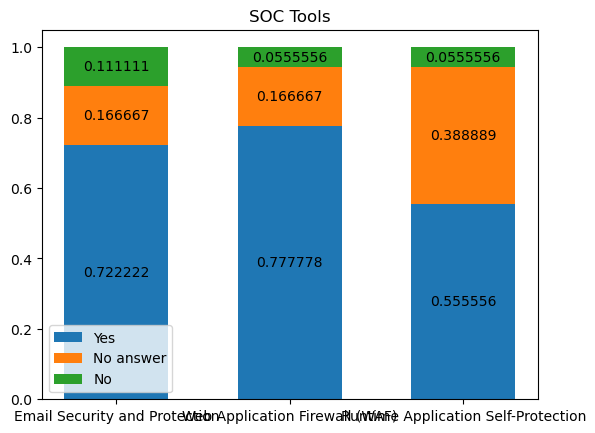

In [36]:
tools = ("Email Security and Protection", "Web Application Firewall (WAF)", "Runtime Application Self-Protection")
tools_counts = {
    'Yes': np.array([dataset["T017"].value_counts(normalize=True)[1.0], 
                    dataset["T018"].value_counts(normalize=True)[1.0],
                    dataset["T019"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T017"].value_counts(normalize=True)[2.0], 
                    dataset["T018"].value_counts(normalize=True)[2.0],
                    dataset["T019"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["T017"].value_counts(normalize=True)[3.0], 
                    dataset["T018"].value_counts(normalize=True)[3.0],
                    dataset["T019"].value_counts(normalize=True)[3.0]])
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for tool, tool_count in tools_counts.items():
    p = ax.bar(tools, tool_count, width, label=tool, bottom=bottom)
    bottom += tool_count

    ax.bar_label(p, label_type='center')

ax.set_title('SOC Tools')
ax.legend()

plt.show()

#### Incident Analysis

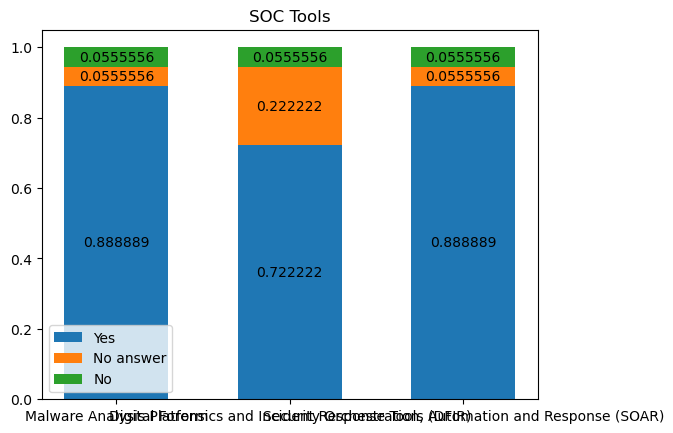

In [37]:
tools = ("Malware Analysis Platform", "Digital Forensics and Incident Response Tools (DFIR)", "Security Orchestration, Automation and Response (SOAR)")
tools_counts = {
    'Yes': np.array([dataset["T025"].value_counts(normalize=True)[1.0], 
                    dataset["T049"].value_counts(normalize=True)[1.0],
                    dataset["T026"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T025"].value_counts(normalize=True)[2.0], 
                    dataset["T049"].value_counts(normalize=True)[2.0],
                    dataset["T026"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["T025"].value_counts(normalize=True)[3.0], 
                    dataset["T049"].value_counts(normalize=True)[3.0],
                    dataset["T026"].value_counts(normalize=True)[3.0]])
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for tool, tool_count in tools_counts.items():
    p = ax.bar(tools, tool_count, width, label=tool, bottom=bottom)
    bottom += tool_count

    ax.bar_label(p, label_type='center')

ax.set_title('SOC Tools')
ax.legend()

plt.show()

#### Security Awareness

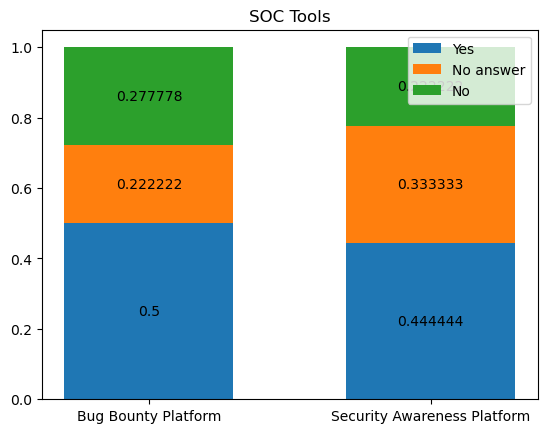

In [38]:
tools = ("Bug Bounty Platform", "Security Awareness Platform")
tools_counts = {
    'Yes': np.array([dataset["T028"].value_counts(normalize=True)[1.0], 
                    dataset["T029"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T028"].value_counts(normalize=True)[2.0],
                    dataset["T029"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["T028"].value_counts(normalize=True)[3.0], 
                    dataset["T029"].value_counts(normalize=True)[3.0]])
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(2)

for tool, tool_count in tools_counts.items():
    p = ax.bar(tools, tool_count, width, label=tool, bottom=bottom)
    bottom += tool_count

    ax.bar_label(p, label_type='center')

ax.set_title('SOC Tools')
ax.legend()

plt.show()

#### Identity Attestation

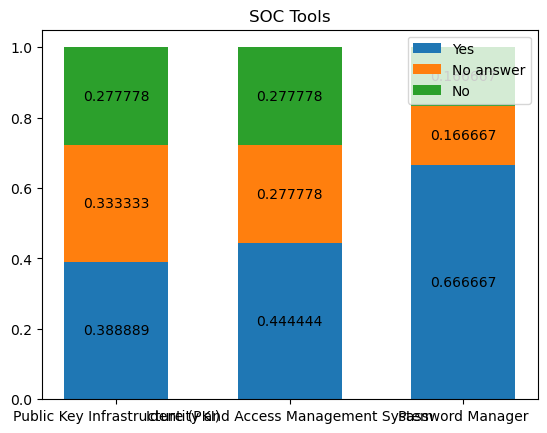

In [39]:
tools = ("Public Key Infrastructure (PKI)", "Identity and Access Management System", "Password Manager")
tools_counts = {
    'Yes': np.array([dataset["T031"].value_counts(normalize=True)[1.0], 
                    dataset["T032"].value_counts(normalize=True)[1.0],
                    dataset["T033"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T031"].value_counts(normalize=True)[2.0],
                    dataset["T032"].value_counts(normalize=True)[2.0],
                    dataset["T033"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["T031"].value_counts(normalize=True)[3.0], 
                    dataset["T032"].value_counts(normalize=True)[3.0],
                    dataset["T033"].value_counts(normalize=True)[3.0]])
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for tool, tool_count in tools_counts.items():
    p = ax.bar(tools, tool_count, width, label=tool, bottom=bottom)
    bottom += tool_count

    ax.bar_label(p, label_type='center')

ax.set_title('SOC Tools')
ax.legend()

plt.show()

#### Management

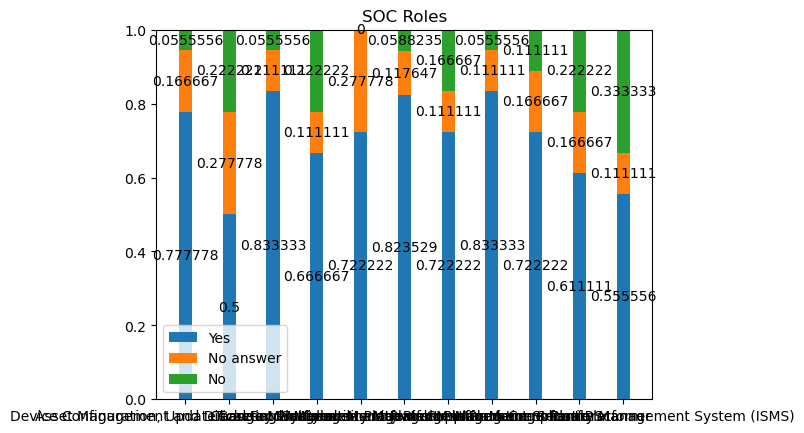

In [40]:
roles = ("Asset Management and Discovery Platform" , "Device Configuration, Update and Patch Management Platform" , "Ticketing System" , "Change Management Platform" , "Case and Incident Management Platform" , "Vulnerability Management Platform" , "Cybersecurity Risk Management Software" , "Knowledge Management Platform" , "Supplier Management Platform" , "Compliance Scanner" , "Information Security Management System (ISMS)")
roles_counts = {
    'Yes': np.array([dataset["T037"].value_counts(normalize=True)[1.0], 
                    dataset["T038"].value_counts(normalize=True)[1.0], 
                    dataset["T039"].value_counts(normalize=True)[1.0], 
                    dataset["T040"].value_counts(normalize=True)[1.0], 
                    dataset["T041"].value_counts(normalize=True)[1.0], 
                    dataset["T042"].value_counts(normalize=True)[1.0], 
                    dataset["T043"].value_counts(normalize=True)[1.0], 
                    dataset["T044"].value_counts(normalize=True)[1.0], 
                    dataset["T045"].value_counts(normalize=True)[1.0], 
                    dataset["T046"].value_counts(normalize=True)[1.0], 
                    dataset["T050"].value_counts(normalize=True)[1.0]]),
    'No answer': np.array([dataset["T037"].value_counts(normalize=True)[2.0], 
                    dataset["T038"].value_counts(normalize=True)[2.0], 
                    dataset["T039"].value_counts(normalize=True)[2.0], 
                    dataset["T040"].value_counts(normalize=True)[2.0], 
                    dataset["T041"].value_counts(normalize=True)[2.0], 
                    dataset["T042"].value_counts(normalize=True)[2.0], 
                    dataset["T043"].value_counts(normalize=True)[2.0], 
                    dataset["T044"].value_counts(normalize=True)[2.0], 
                    dataset["T045"].value_counts(normalize=True)[2.0], 
                    dataset["T046"].value_counts(normalize=True)[2.0], 
                    dataset["T050"].value_counts(normalize=True)[2.0]]),
    'No': np.array([dataset["T037"].value_counts(normalize=True)[3.0], 
                    dataset["T038"].value_counts(normalize=True)[3.0], 
                    dataset["T039"].value_counts(normalize=True)[3.0], 
                    dataset["T040"].value_counts(normalize=True)[3.0], 
                    0, 
                    dataset["T042"].value_counts(normalize=True)[3.0], 
                    dataset["T043"].value_counts(normalize=True)[3.0], 
                    dataset["T044"].value_counts(normalize=True)[3.0], 
                    dataset["T045"].value_counts(normalize=True)[3.0], 
                    dataset["T046"].value_counts(normalize=True)[3.0], 
                    dataset["T050"].value_counts(normalize=True)[3.0]]),
}
width = 0.3  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(11)

for role, roles_count in roles_counts.items():
    p = ax.bar(roles, roles_count, width, label=role, bottom=bottom)
    bottom += roles_count

    ax.bar_label(p, label_type='center')

ax.set_title('SOC Roles')
ax.legend()

plt.show()

### Missing Tools

In [41]:
tools_missing = dataset["T047"].value_counts()
tools_missing

1.0    15
2.0     3
Name: T047, dtype: int64